# Importing Libraries and installing if need

In [ ]:
#!pip install opencv-python


In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands #el

mp_pose = mp.solutions.pose # vücut

# Check open cv and mediapipe holistic

In [ ]:
# # For static images:
# IMAGE_FILES = []
# with mp_hands.Hands(
#     static_image_mode=True,
#     max_num_hands=2,
#     min_detection_confidence=0.5) as hands:
#   for idx, file in enumerate(IMAGE_FILES):
#     # Read an image, flip it around y-axis for correct handedness output (see
#     # above).
#     image = cv2.flip(cv2.imread(file), 1)
#     # Convert the BGR image to RGB before processing.
#     results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#     # Print handedness and draw hand landmarks on the image.
#     print('Handedness:', results.multi_handedness)
#     if not results.multi_hand_landmarks:
#       continue
#     image_height, image_width, _ = image.shape
#     annotated_image = image.copy()
#     for hand_landmarks in results.multi_hand_landmarks:
#       print('hand_landmarks:', hand_landmarks)
#       print(
#           f'Index finger tip coordinates: (',
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
#       )
#       mp_drawing.draw_landmarks(
#           annotated_image,
#           hand_landmarks,
#           mp_hands.HAND_CONNECTIONS,
#           mp_drawing_styles.get_default_hand_landmarks_style(),
#           mp_drawing_styles.get_default_hand_connections_style())
#     cv2.imwrite(
#         '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
#     # Draw hand world landmarks.
#     if not results.multi_hand_world_landmarks:
#       continue
#     for hand_world_landmarks in results.multi_hand_world_landmarks:
#       mp_drawing.plot_landmarks(
#         hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

pose = mp_pose.Pose(
  min_detection_confidence=0.6,
  min_tracking_confidence=0.6)

hands = mp_hands.Hands(
    model_complexity = 0,
    min_detection_confidence = 0.6,
    min_tracking_confidence=0.6)

#holistic = mp_holistic.Holistic(min_detection_confidence = 0.5
# For webcam input:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hand_results = hands.process(image)
    pose_results = pose.process(image)
    #print(results)
    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        pose_results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    if hand_results.multi_hand_landmarks: # hand landmark dizisi dolu ise çalışır
      for hand_landmarks in hand_results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#hand_landmarks.landmark
#hand_results.multi_hand_landmarks#her noktanın x y z koordinatları
#mp_hands.HAND_CONNECTIONS #birbirine bağlanan noktalar

In [ ]:
#pose_results.pose_landmarks #her noktanın x y z koordinatları
#mp_pose.POSE_CONNECTIONS # noktaları birleştiren kenarlar
#hand_landmarks.landmark
total_hand_landmarks = []
dizi = hand_results.multi_hand_landmarks
type(dizi)
for hand_landmarks in dizi:
    for landmark in hand_landmarks.landmark:
        x = landmark.x
        y = landmark.y
        z = landmark.z
        total_hand_landmarks.append({'x': x, 'y': y, 'z': z})
len(total_hand_landmarks)

21

# Last frame from camera if we see landmarks on human everything should be right

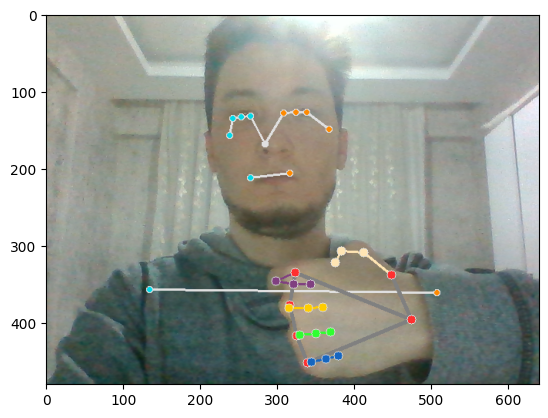

In [ ]:
#plt.imshow(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Extract only hand and pose landmarks x and y values

In [ ]:
#3 extract landmarks
def extract_keypoints(hand_landmarks,pose_results):
    total_hand_landmarks = []
    pose = []
    dizi = hand_results.multi_hand_landmarks
    type(dizi)
    if dizi is not None:
        for hand_landmarks in dizi:
            for landmark in hand_landmarks.landmark:
                x = landmark.x
                y = landmark.y
                test = np.array([x, y])
                total_hand_landmarks.append(test)
        #If dot's visibility more then 0.9 we add to list
        #At default predicts the unseen points of the pose landmark array and adds them to the array
        for res in pose_results.pose_landmarks.landmark:
            if res.visibility > 0.9:
                test1 = np.array([res.x, res.y])
                pose.append(test1)
        len(pose)
        toplam = total_hand_landmarks + pose
        return toplam
noktalar = extract_keypoints(hand_landmarks,pose_results)
len(noktalar)

34

In [ ]:
maxnoktalar = 32 + 21 + 21

In [ ]:
noktalar

[array([0.7417776 , 0.82661736]),
 array([0.7009632 , 0.70515341]),
 array([0.64383376, 0.64572948]),
 array([0.59924161, 0.63967335]),
 array([0.58708793, 0.67181808]),
 array([0.50517046, 0.69816899]),
 array([0.4662171 , 0.72274411]),
 array([0.50204337, 0.7309525 ]),
 array([0.53616548, 0.73066479]),
 array([0.49529415, 0.78692323]),
 array([0.4936232 , 0.79538524]),
 array([0.53189611, 0.79536957]),
 array([0.56168848, 0.79269594]),
 array([0.50805467, 0.86988163]),
 array([0.51421893, 0.86858034]),
 array([0.54789633, 0.8639375 ]),
 array([0.5775696 , 0.85860538]),
 array([0.53071451, 0.94312394]),
 array([0.53763461, 0.9408825 ]),
 array([0.56795061, 0.93144351]),
 array([0.59347188, 0.9247306 ]),
 array([0.44438863, 0.35107887]),
 array([0.48169383, 0.26783875]),
 array([0.50662315, 0.26627514]),
 array([0.52858353, 0.26633403]),
 array([0.41440812, 0.27523386]),
 array([0.39550194, 0.27822468]),
 array([0.37931201, 0.28264099]),
 array([0.57379347, 0.3110688 ]),
 array([0.3722

In [ ]:
# #only hand graphic
# x_coords = [point[0] for point in hand]
# y_coords = [point[1] for point in hand]
# plt.figure(figsize=(10, 6))
# plt.plot(x_coords, -np.array(y_coords), marker='o', linestyle='', markersize=6, color='black') #düz
# plt.title('Hand Graphic')
# plt.xlabel('X Koordinatı')
# plt.ylabel('Y Koordinatı')
# plt.grid(True)
# plt.show()

In [ ]:
#record data and data collections

In [ ]:
x_coords = [point[0] for point in noktalar]
y_coords = [point[1] for point in noktalar]

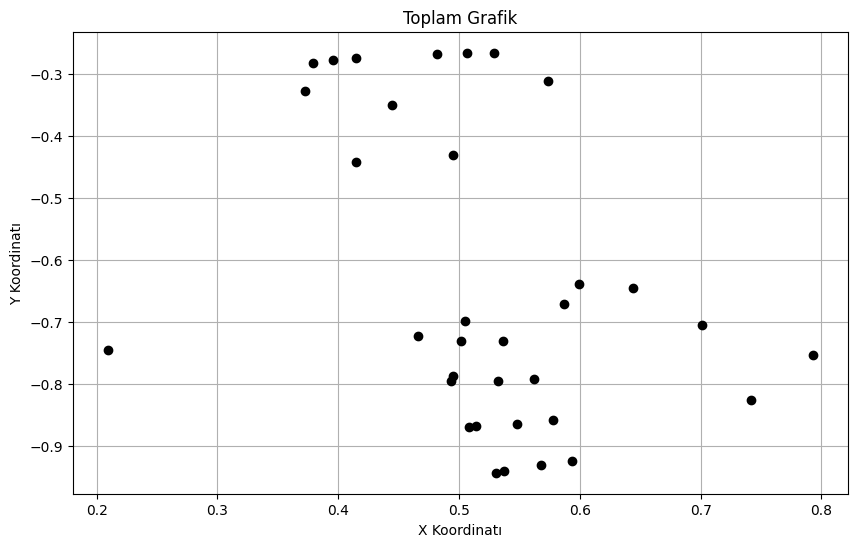

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_coords, -np.array(y_coords), marker='o', linestyle='', markersize=6, color='black') #düz
plt.title('Toplam Grafik')
plt.xlabel('X Koordinatı')
plt.ylabel('Y Koordinatı')
plt.grid(True)
plt.show()

In [ ]:
pose = mp_pose.Pose(
  min_detection_confidence=0.6,
  min_tracking_confidence=0.6)

hands = mp_hands.Hands(
    model_complexity = 0,
    min_detection_confidence = 0.6,
    min_tracking_confidence=0.6)
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    hand_results = hands.process(image)
    pose_results = pose.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, hand_results, pose_results

In [ ]:
def draw_landmarks(image, hand_results, pose_results):
   # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image,
        pose_results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    if hand_results.multi_hand_landmarks: # hand landmark dizisi dolu ise çalışır
      for hand_landmarks in hand_results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

# Saving numpy array to folder

In [ ]:
datapath = os.path.join('signs')
actions = np.array(['merhaba', 'çok', 'gel', 'iyi', 'ben'])
actions = np.array(['ben', 'çok', 'gel', 'iyi', 'merhaba'])

# 15 video
no_sequences = 15

#30 frame for every video
sequence_length = 30
datapath = 'C:/Users/hp/SıgnLanguage/signs'

# Varlık kontrolü
if not os.path.exists(datapath):
    os.makedirs(datapath)
    print("hey")


In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(datapath, action, str(sequence)))
        except:
            pass

In [ ]:
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils
# cap = cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#     for action in actions:
#         for sequence in range(no_sequences):
#             for frame_num in range(sequence_length):
#                 ret, frame = cap.read()

#                 image ,hand_results, pose_results = mediapipe_detection(frame, holistic)

#                 draw_landmarks(image,hand_results,pose_results)

#                 if frame_num == 0:
#                     cv2.putText(image,' STARTIN COLLECTION', (120,200),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
#                     cv2.putText(image, 'collecting frames for {} video number {}'.format(action, sequence), (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
#                     cv2.waitKey(2000)
#                 else:
#                     cv2.putText(image, 'collecting frames for {} Video number {}'.format(action, sequence), (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,0,255), 1, cv2.LINE_AA)

#                 keypoints = extract_keypoints(hand_results, pose_results)
#                 npy_path = os.path.join(datapath, action, str(sequence), str(frame_num))
#                 np.save(npy_path,keypoints)

#                 cv2.imshow('opencv ',image)
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
#     cap.release()
#     cv2.destroyAllWindows()







In [ ]:
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils
# cap = cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#     while cap.isOpened():
#       ret, frame = cap.read()

#       image, hand_results, pose_results = mediapipe_detection(frame, holistic)
#       #print(results)

#       draw_landmarks(image,hand_results,pose_results)

#       cv2.imshow('OpenCV Feed', image)
#       if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
datapath2 = r"anywordpath"
npy_path = os.path.join(datapath2,"0.npy")
kare = np.load(npy_path)

In [ ]:
kare

array([[ 0.13994695,  0.72254306],
       [ 0.08961084,  0.60905451],
       [ 0.0832226 ,  0.48287499],
       [ 0.09484483,  0.38121924],
       [ 0.10786127,  0.30531225],
       [ 0.17309125,  0.42774945],
       [ 0.24567474,  0.29402572],
       [ 0.29048482,  0.22376831],
       [ 0.32865259,  0.17196748],
       [ 0.22725327,  0.46801659],
       [ 0.30054221,  0.31749821],
       [ 0.34456781,  0.23501243],
       [ 0.38056523,  0.17232808],
       [ 0.27469587,  0.52325785],
       [ 0.33996165,  0.37677497],
       [ 0.37957513,  0.29504716],
       [ 0.40545321,  0.23420179],
       [ 0.31297028,  0.58936083],
       [ 0.37100568,  0.47870922],
       [ 0.3997125 ,  0.41103801],
       [ 0.41857952,  0.35342765],
       [ 0.37761861,  0.18366513],
       [ 0.40044346,  0.09270181],
       [ 0.41861469,  0.08783715],
       [ 0.43481797,  0.08250257],
       [ 0.33096123,  0.10990892],
       [ 0.30554944,  0.11733785],
       [ 0.2826913 ,  0.12451519],
       [ 0.44412151,

In [ ]:
x_coords = [point[0] for point in kare]
y_coords = [point[1] for point in kare]

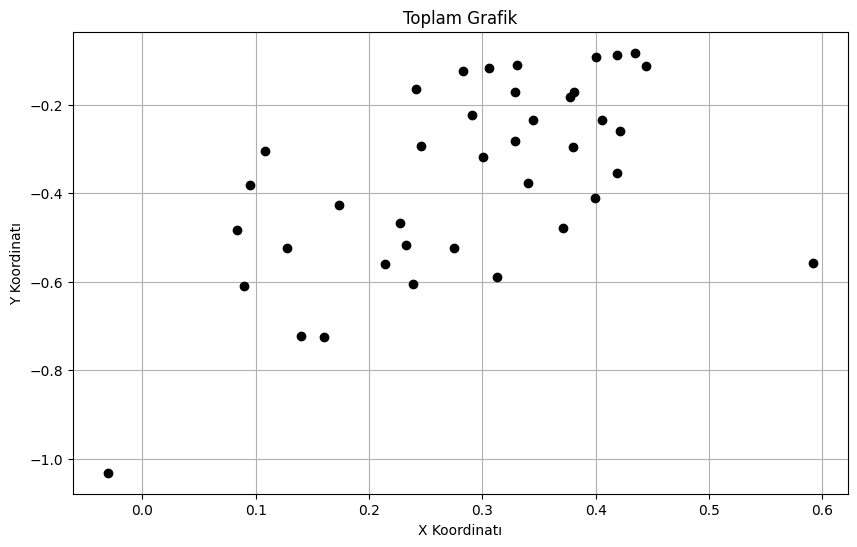

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_coords, -np.array(y_coords), marker='o', linestyle='', markersize=6, color='black') #düz
plt.title('Toplam Grafik')
plt.xlabel('X Koordinatı')
plt.ylabel('Y Koordinatı')
plt.grid(True)
plt.show()

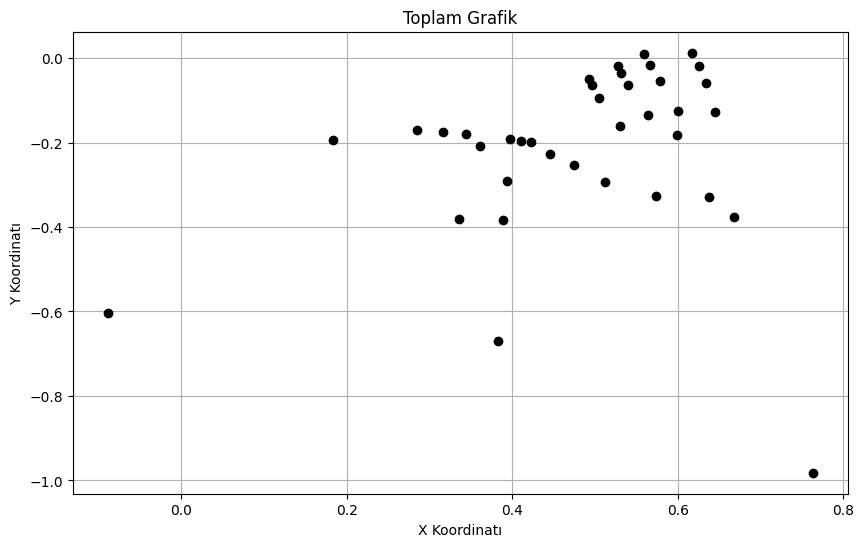

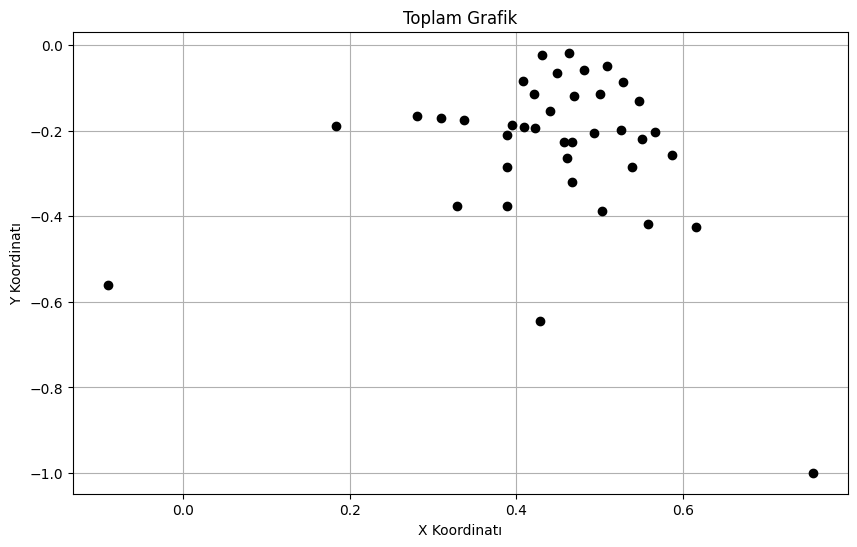

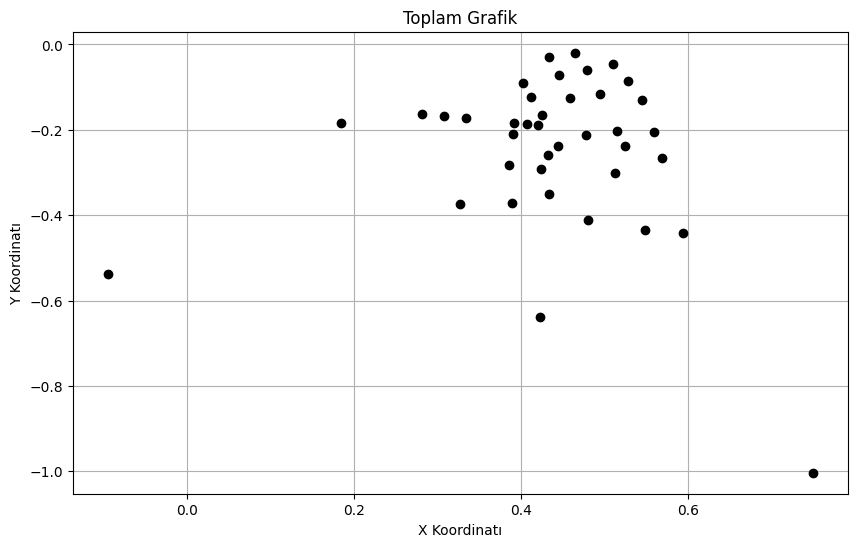

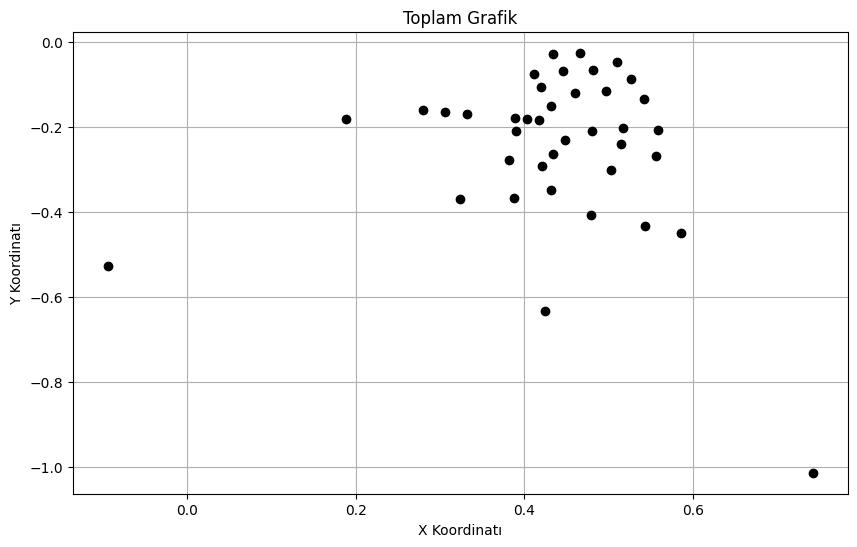

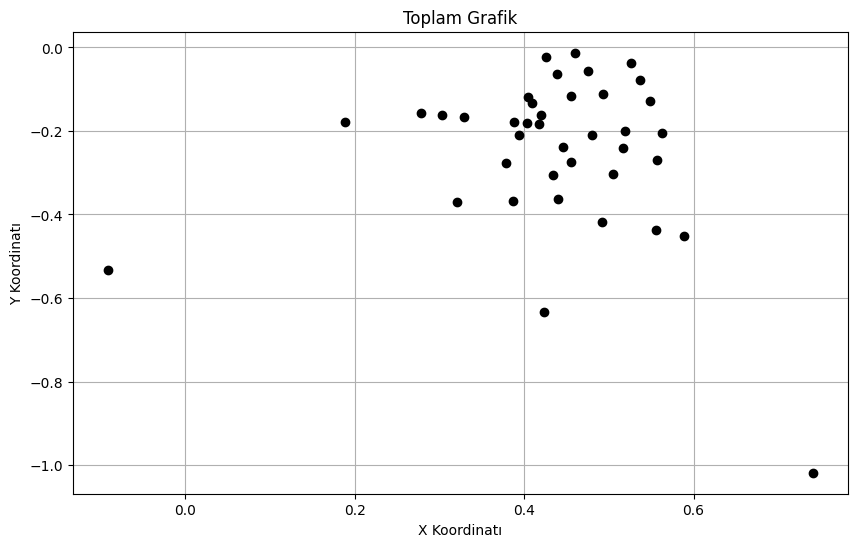

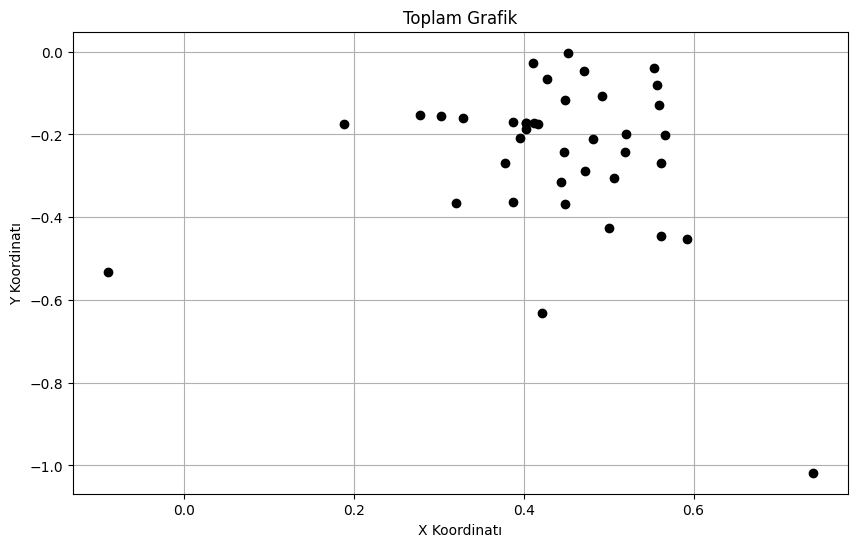

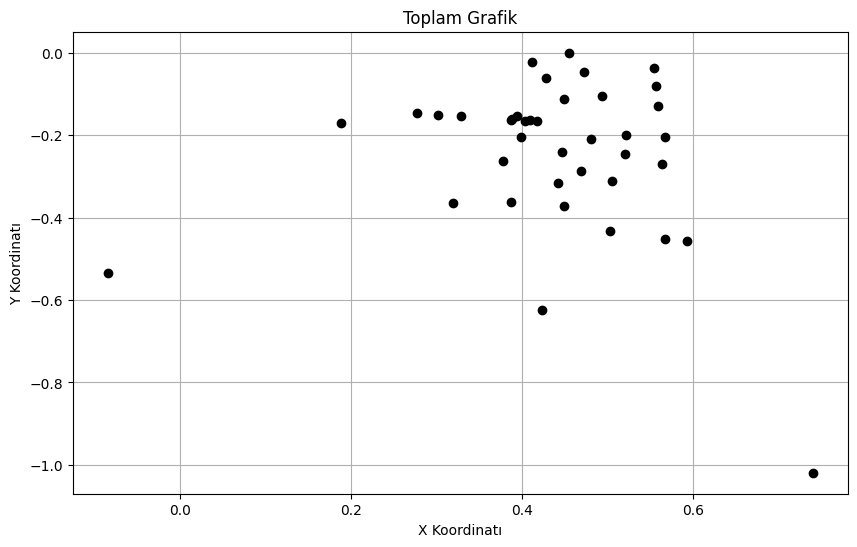

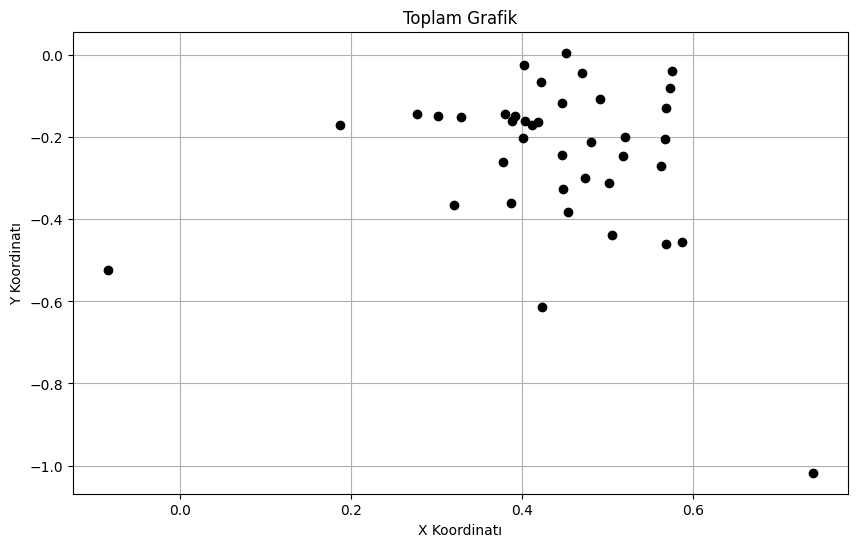

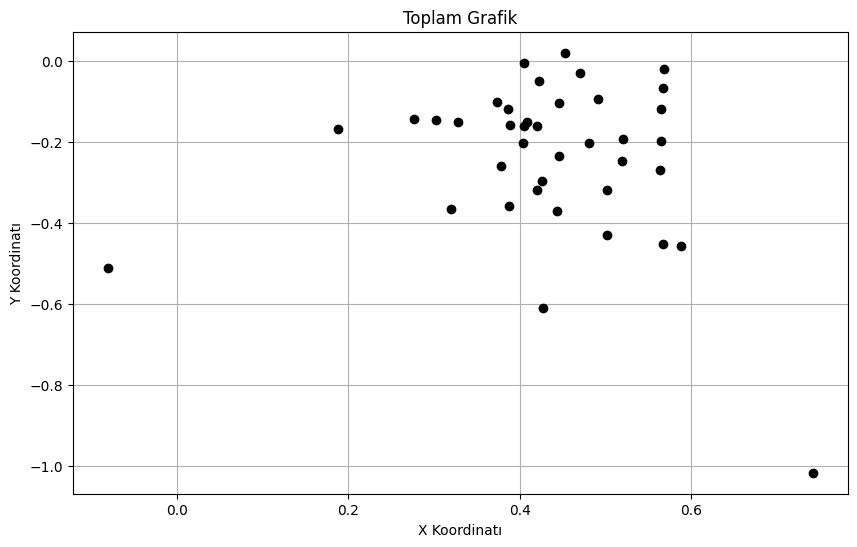

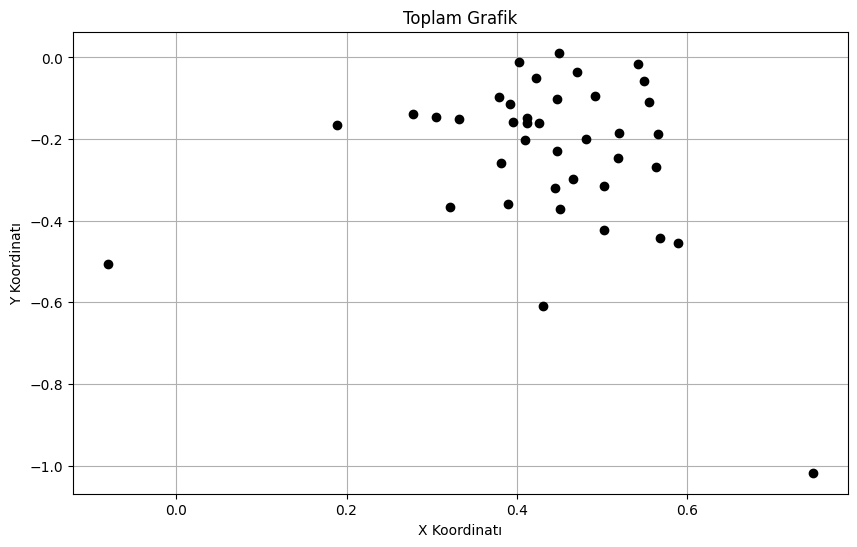

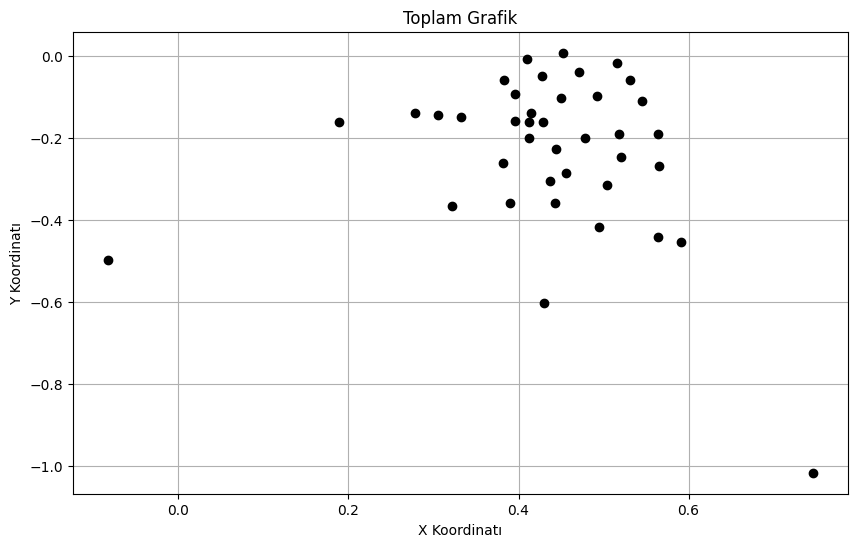

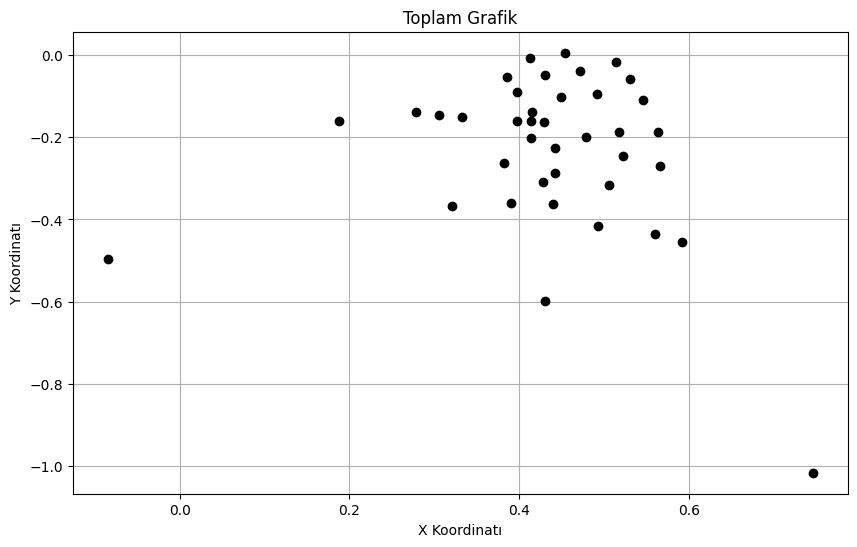

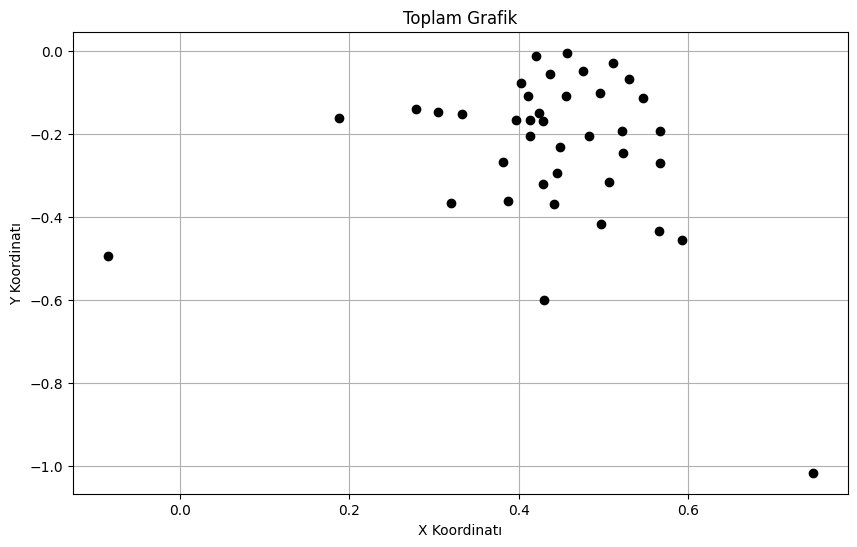

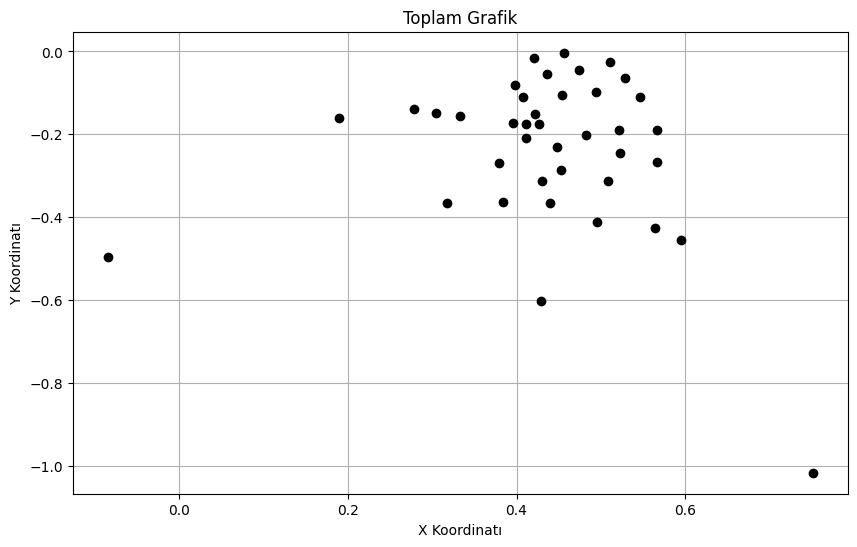

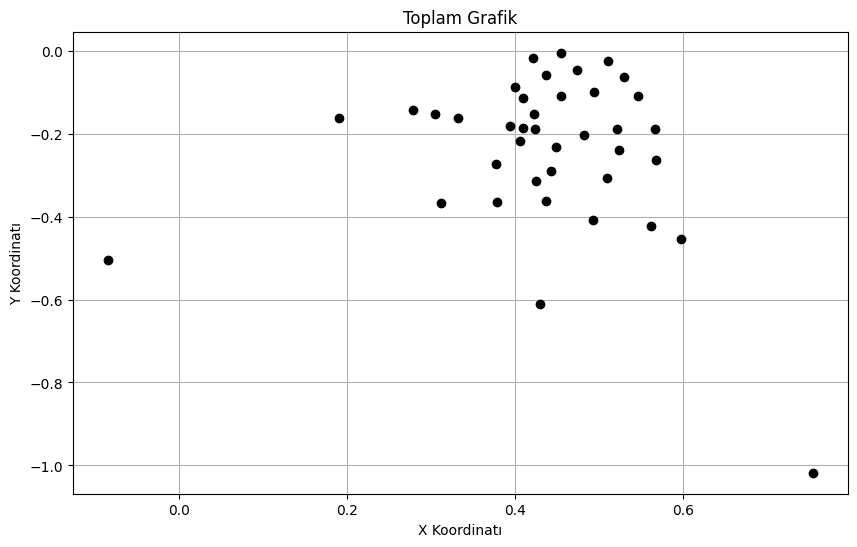

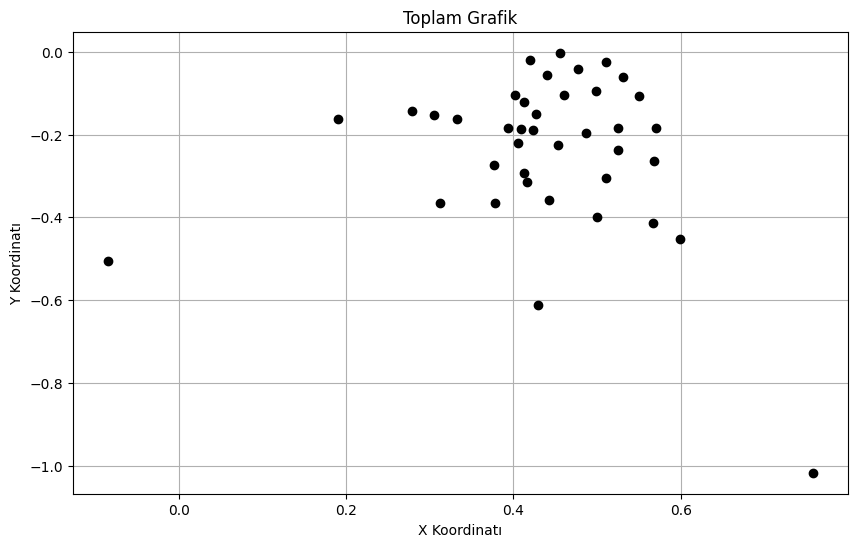

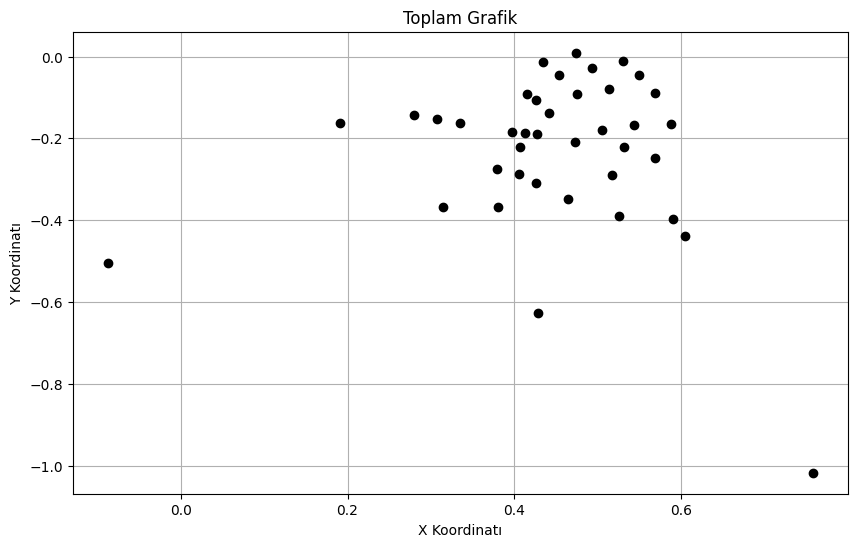

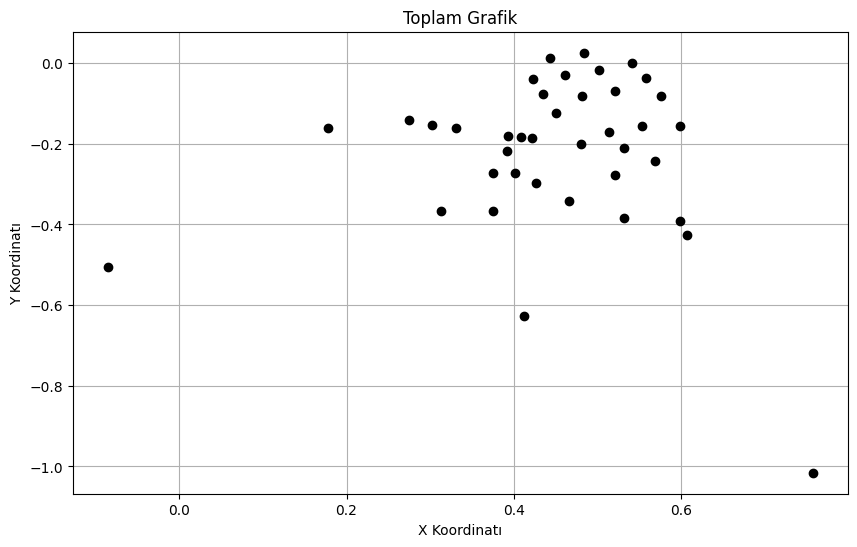

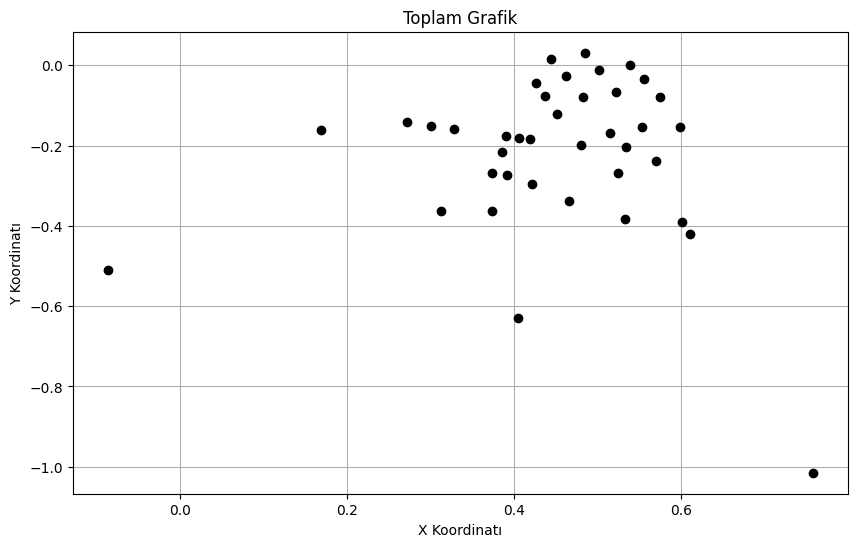

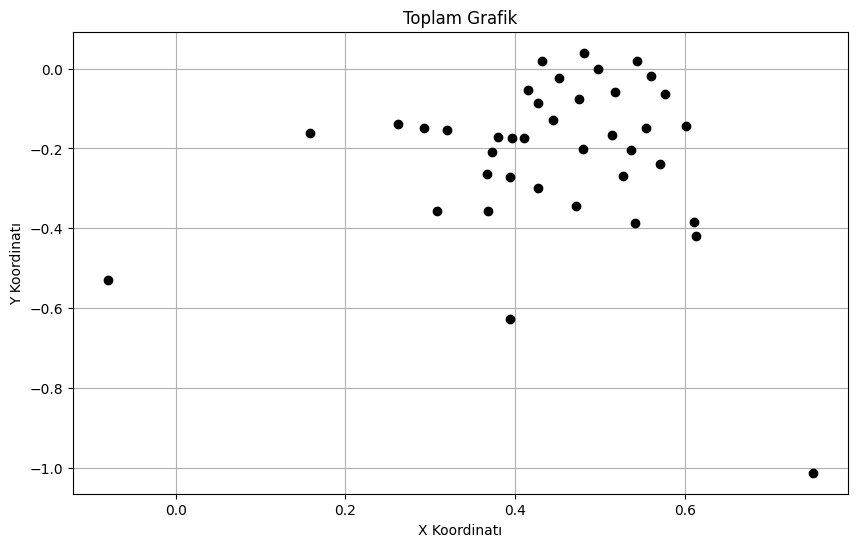

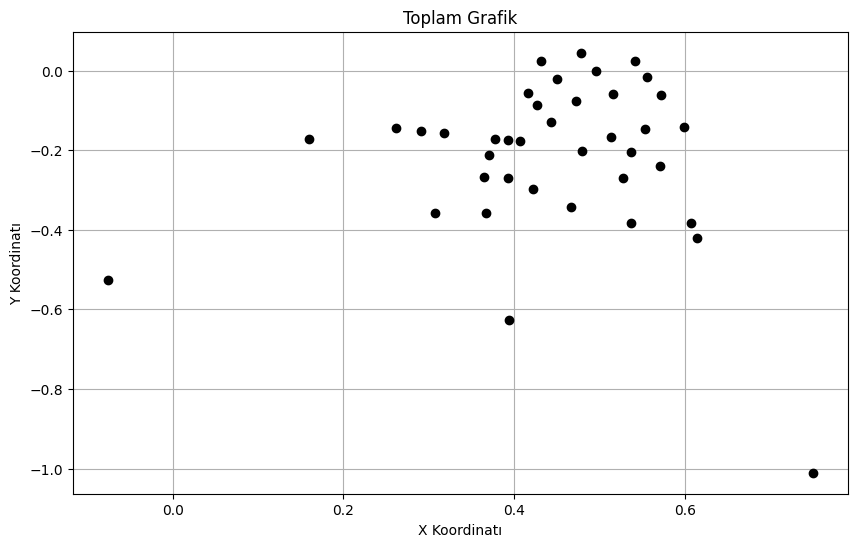

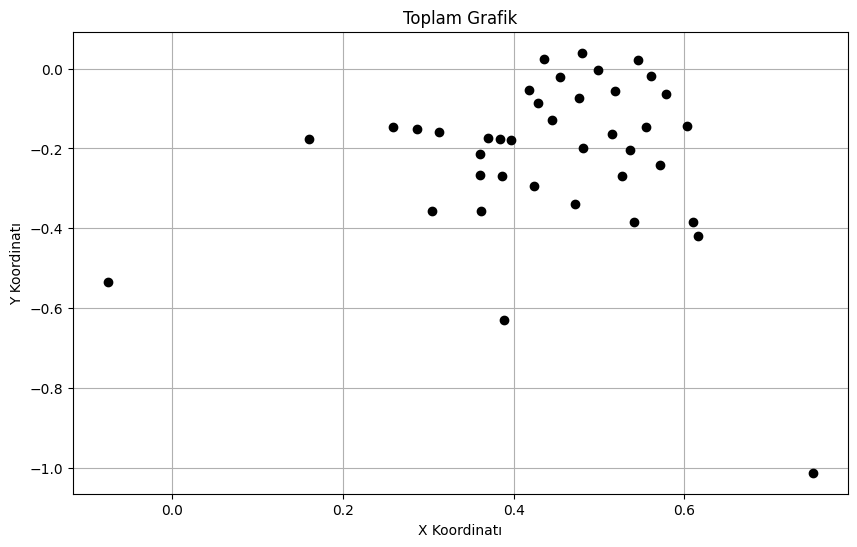

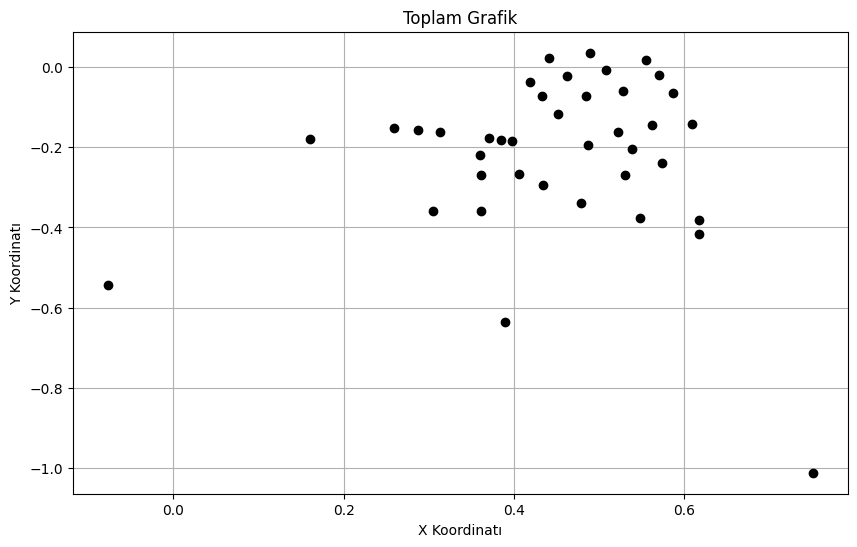

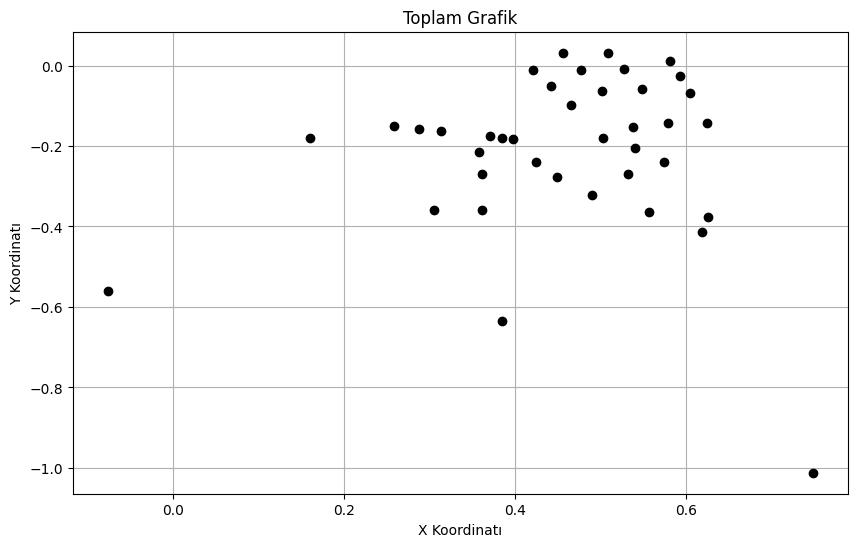

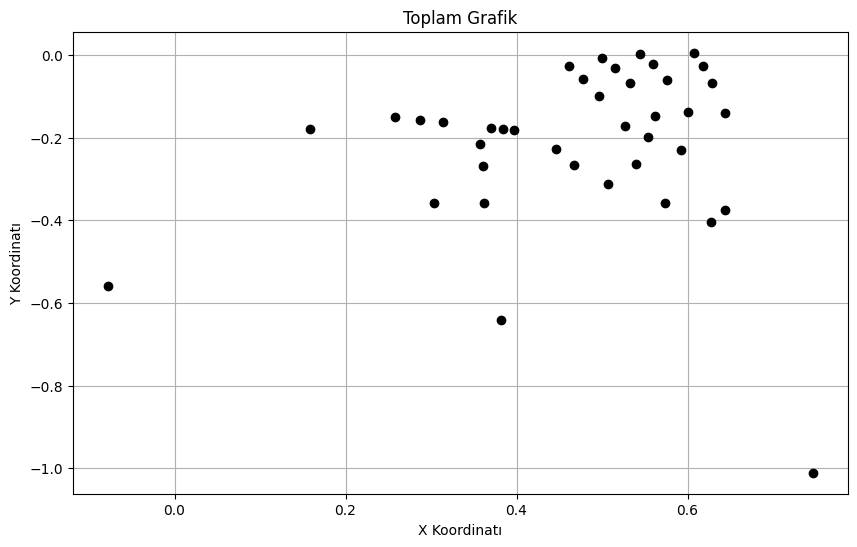

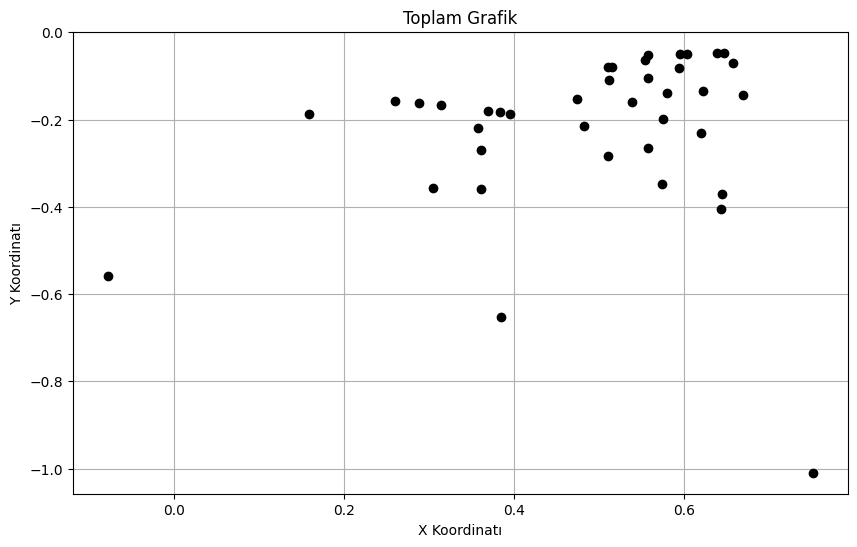

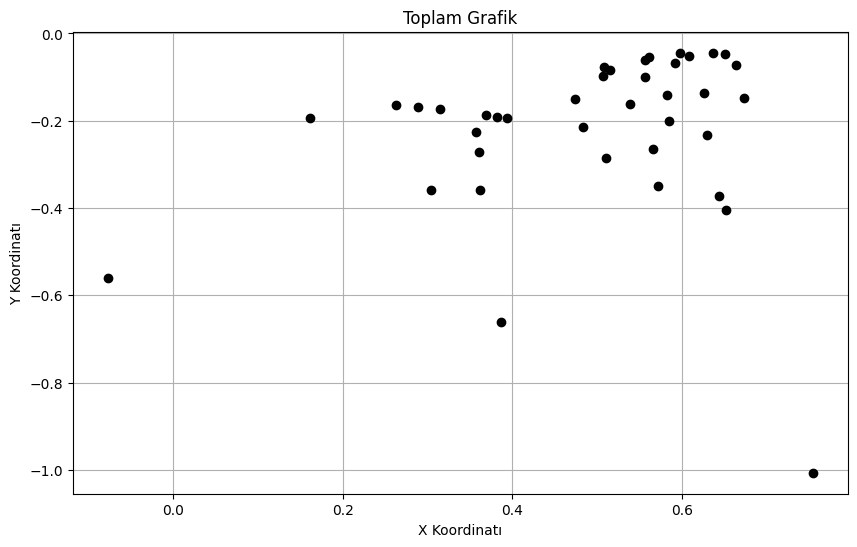

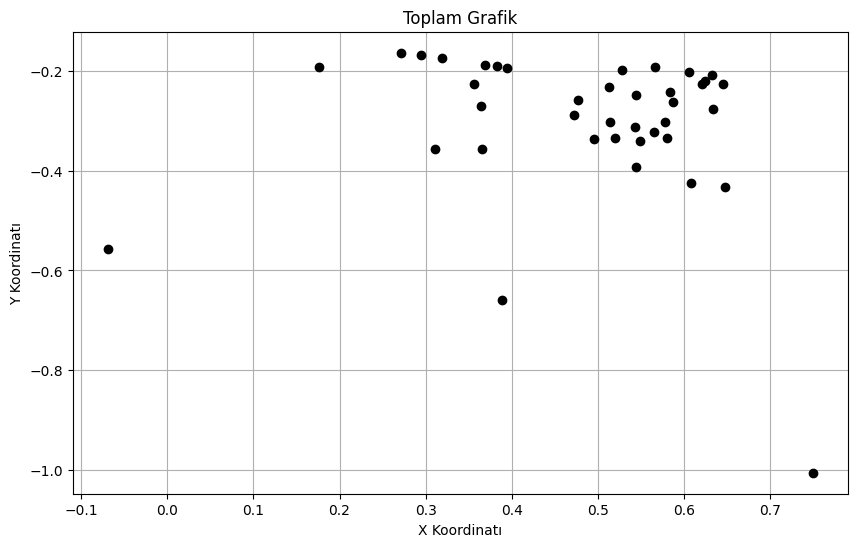

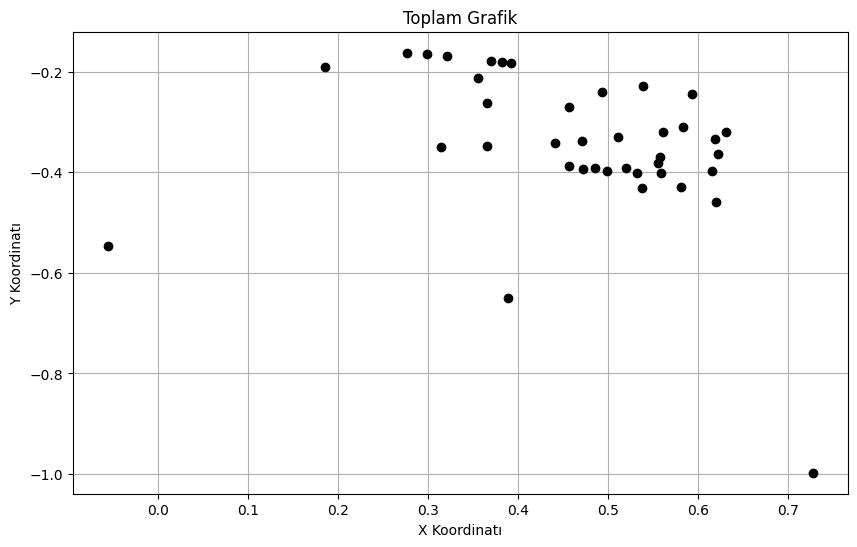

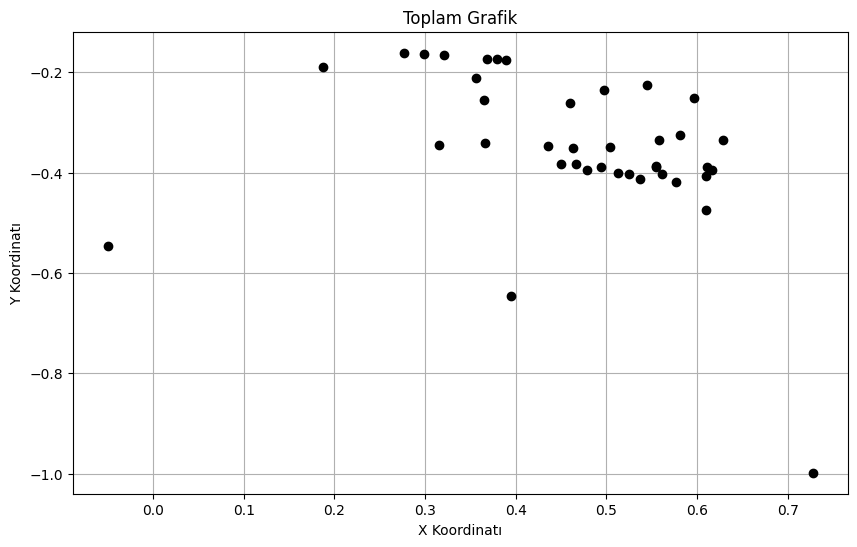

In [ ]:
datapath2 = r"C:\Users\Hp\Desktop\bitirmeproje\signs\merhaba\0"
for i in range(30):
    npy_path = os.path.join(datapath2,str(i) + ".npy")
    kare = np.load(npy_path)
    x_coords = [point[0] for point in kare]
    y_coords = [point[1] for point in kare]
    plt.figure(figsize=(10, 6))
    plt.plot(x_coords, -np.array(y_coords), marker='o', linestyle='', markersize=6, color='black') #düz
    plt.title('Toplam Grafik')
    plt.xlabel('X Koordinatı')
    plt.ylabel('Y Koordinatı')
    plt.grid(True)
    plt.show()

In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

# Get data from folder for train

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

#loss = sparse_softmax_cross_entropy(labels, logits)

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'ben': 0, 'çok': 1, 'gel': 2, 'iyi': 3, 'merhaba': 4}

In [ ]:
# labels = []
# for action in actions:
#      for sequence in range(no_sequences):
#         labels.append(label_map[action])

In [ ]:
sequences, labels = [], [] #loading data from records(MP_DATA FOLDER)
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):

            try:
                res = np.load(os.path.join(datapath, action, str(sequence), "{}.npy".format(frame_num)))
            except:
                print("object veri tipi yuklenmedi")
            try:
                res = res.tolist()
            except:
                print("res degiskeni zaten dizi")
            res = res[:25]
            print(type(res))
            print(len(res))
            #if not isinstance(res, object):
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


<class 'list'>
25
<class 'list'>
25
object veri tipi yuklenmedi
res degiskeni zaten dizi
<class 'list'>
25
<class 'list'>
25
object veri tipi yuklenmedi
res degiskeni zaten dizi
<class 'list'>
25
object veri tipi yuklenmedi
res degiskeni zaten dizi
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
object veri tipi yuklenmedi
res degiskeni zaten dizi
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
object veri tipi yuklenmedi
res degiskeni zaten dizi
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>
25
<class 'list'>


In [ ]:
type(res)

list

In [ ]:
len(window)

30

In [ ]:
len(res)

25

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [ ]:
len(sequences)

75

In [ ]:
sequences

[[[[0.13994695246219635, 0.7225430607795715],
   [0.08961084485054016, 0.6090545058250427],
   [0.08322259783744812, 0.4828749895095825],
   [0.09484483301639557, 0.3812192380428314],
   [0.10786126554012299, 0.30531224608421326],
   [0.17309124767780304, 0.4277494549751282],
   [0.2456747442483902, 0.294025719165802],
   [0.29048481583595276, 0.22376830875873566],
   [0.32865259051322937, 0.17196747660636902],
   [0.2272532731294632, 0.4680165946483612],
   [0.3005422055721283, 0.31749820709228516],
   [0.34456780552864075, 0.23501242697238922],
   [0.38056522607803345, 0.17232808470726013],
   [0.27469587326049805, 0.523257851600647],
   [0.3399616479873657, 0.37677496671676636],
   [0.37957513332366943, 0.29504716396331787],
   [0.4054532051086426, 0.23420178890228271],
   [0.31297028064727783, 0.5893608331680298],
   [0.37100568413734436, 0.47870922088623047],
   [0.3997125029563904, 0.41103801131248474],
   [0.4185795187950134, 0.3534276485443115],
   [0.37761861085891724, 0.18366

In [ ]:
np.array(sequences).shape

(75, 30, 25, 2)

In [ ]:
sequences_reshaped = np.array(sequences).reshape((75, 30, 50))

In [ ]:
np.array(sequences_reshaped).shape

(75, 30, 50)

In [ ]:
len(labels)

75

In [ ]:
X = np.array(sequences_reshaped)

In [ ]:
X.shape

(75, 30, 50)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [ ]:
# model = Sequential()
# model.add(LSTM(64,return_sequences = True, activation = 'relu', input_shape=(15,75)))
# model.add(LSTM(64,return_sequences = True, activation = 'relu'))
# model.add(LSTM(64,return_sequences = False, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(actions.shape[0], activation = 'softmax'))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 50)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
res = [0.2,0.1,0.1,0.1,0.5]

In [ ]:
actions[np.argmax(res)]

'merhaba'

In [ ]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['categorical_accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,callbacks=[tb_callback])

Epoch 1/50
3/3 [==============================] - 3s 46ms/step - loss: 1.6069 - categorical_accuracy: 0.2836
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 1.5934 - categorical_accuracy: 0.3881
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 1.5742 - categorical_accuracy: 0.4030
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 1.5545 - categorical_accuracy: 0.4030
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 1.5066 - categorical_accuracy: 0.4478
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 1.3984 - categorical_accuracy: 0.4776
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 1.1735 - categorical_accuracy: 0.4925
Epoch 8/50
3/3 [==============================] - 0s 34ms/step - loss: 1.2508 - categorical_accuracy: 0.4030
Epoch 9/50
3/3 [==============================] - 0s 30ms/step - loss: 1.2765 - categorical_accuracy: 0.4925
Epoch 10/50
3/3 [==

In [ ]:
len(sequences_reshaped[0][0])

50

In [ ]:
len(kare)

39

In [ ]:
kare = kare[:25]
len(kare)


25

In [ ]:
kareler = []
kareler_toplami = []
for i in range(30):
    kareler.append(kare)
for i in range(75):
    kareler_toplami.append(kareler)
np.array(kareler_toplami).shape

kareler_toplami_reshaped = np.array(kareler_toplami).reshape((75,30, 50))
kareler_toplami_reshaped.shape

(75, 30, 50)

In [ ]:
actions[np.argmax(model.predict(kareler_toplami_reshaped)[0])]
#actions[np.argmax(model.predict(sequences_reshaped)[0])]

3/3 [==============================] - 0s 13ms/step


'ben'

In [ ]:
model.predict(kareler_toplami_reshaped)[0]

3/3 [==============================] - 0s 12ms/step


array([0.7749007 , 0.01895454, 0.10448362, 0.05021452, 0.05144657],
      dtype=float32)

In [ ]:
# model.predict(kareler)
sequences_reshaped.shape

(75, 30, 50)

In [ ]:
model.predict(sequences_reshaped)

3/3 [==============================] - 0s 21ms/step


array([[5.12176812e-01, 2.58204236e-04, 4.86075252e-01, 1.48942531e-03,
        3.18738273e-07],
       [1.00000000e+00, 7.10901518e-17, 1.39298739e-09, 3.67375977e-16,
        5.40409124e-12],
       [1.00000000e+00, 6.21013619e-31, 3.79888718e-17, 3.07678446e-32,
        2.03756335e-21],
       [9.94594753e-01, 4.91611681e-05, 4.22562659e-03, 1.10272536e-04,
        1.02011347e-03],
       [1.00000000e+00, 2.27228228e-24, 1.01802579e-13, 1.85102760e-24,
        3.39348663e-17],
       [1.00000000e+00, 1.85759622e-27, 2.26805798e-15, 4.93854275e-27,
        1.89244332e-19],
       [1.00000000e+00, 1.30113930e-31, 1.24387806e-17, 1.53398765e-32,
        3.91613399e-22],
       [1.00000000e+00, 6.67923242e-28, 1.38762653e-15, 7.58416864e-28,
        1.35461100e-19],
       [1.00000000e+00, 4.22058675e-33, 1.70932221e-18, 5.36186366e-34,
        2.14587963e-23],
       [1.00000000e+00, 7.22488421e-23, 6.45890893e-13, 1.53960001e-22,
        4.55266233e-16],
       [1.00000000e+00, 2.2040

In [ ]:
actions[np.argmax(model.predict(sequences_reshaped)[20])]

3/3 [==============================] - 0s 17ms/step


'ben'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            29440     
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 101,893
Trainable params: 101,893
Non-trai

In [ ]:
model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


array([[1.96756758e-02, 3.06749882e-07, 9.80320930e-01, 3.04721880e-06,
        7.08211972e-13],
       [1.05977932e-03, 2.40186837e-05, 4.97263810e-03, 9.93936002e-01,
        7.57481394e-06],
       [8.83130583e-11, 5.51891761e-18, 1.00000000e+00, 5.69439509e-31,
        1.96248561e-33],
       [1.00000000e+00, 7.22488421e-23, 6.45890893e-13, 1.53960001e-22,
        4.55266233e-16],
       [1.00000000e+00, 7.22961306e-34, 7.03331874e-19, 6.27910913e-35,
        8.92681311e-24],
       [1.41859986e-03, 8.19303750e-06, 3.99253145e-03, 9.94575977e-01,
        4.69953784e-06],
       [1.20122574e-01, 4.86863881e-01, 1.41055778e-01, 8.59860182e-02,
        1.65971696e-01],
       [1.33366823e-01, 4.66405243e-01, 1.48631647e-01, 9.72396061e-02,
        1.54356614e-01]], dtype=float32)

In [ ]:
model.save('ilk_model')

INFO:tensorflow:Assets written to: ilk_model\assets


INFO:tensorflow:Assets written to: ilk_model\assets


In [ ]:
#confussion matrix ve başarı oranı(accuracy)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [ ]:
ytrue = np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

1.0

# Predict from live camera data (on working)

In [ ]:
# cap = cv2.VideoCapture(0)
# mp_holistic = mp.solutions.holistic

# sequence = []
# sentence = []
# treshold = 0.4

# while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     hand_results = hands.process(image)
#     pose_results = pose.process(image)
#     #print(results)
#     # Draw the hand annotations on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         pose_results.pose_landmarks,
#         mp_pose.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#     if hand_results.multi_hand_landmarks: # hand landmark dizisi dolu ise çalışır
#       for hand_landmarks in hand_results.multi_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())

#     #PREDİCTİONS
#     keypoints = extract_keypoints(hand_results, pose_results)
#     sequence.insert(0,keypoints)
#     sequence = sequence[:30]

#     if len(sequence) == 30:
#         res = model.predict(np.expand_dims(sequence, axis = 0))[0]
#         print(actions[np.argmax(res)])

#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == ord('q'):
#       break
# cap.release()
# cv2.destroyAllWindows()